In [13]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')


####  Exercise 1: Create a bar chart and a corresponding pivot table of the top 10 most expensive Neigborhoods
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood, then we take the top ten and weight each slice 
by the average value.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

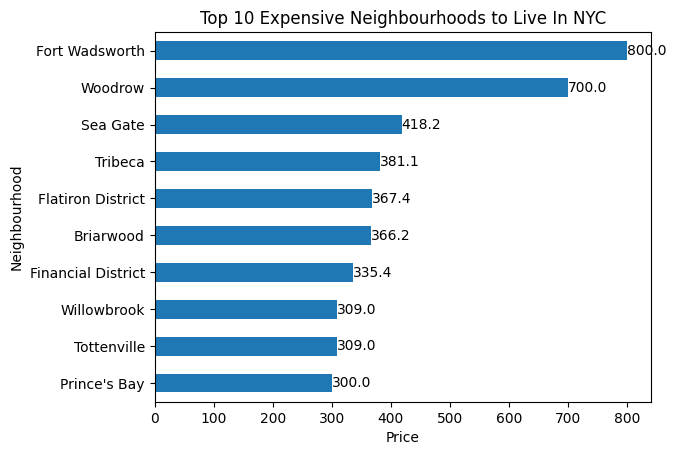

In [15]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

df_temp = df.groupby('neighbourhood')['price'].mean()  # grouping by neighborhood and showing average price per neighbourhood
# PS "by=" DOES NOT WORK WITH GROUBY 
#sorted1 = sorted.sort_values(by="price", ascending=False)
sorted_exp = df_temp.sort_values(ascending=False).reset_index()  
#sorted_exp = sorted.head(10) # selecting top 10
sorted_exp = sorted_exp.head(10)


# did not work without this method, seems like my pandas package has issues

plot = sorted_exp.plot.barh(x='neighbourhood', y='price', legend=False)
plot.invert_yaxis() # goes from highest to lowest
plot.set_xlabel('Price')
plot.set_ylabel('Neighbourhood')
plot.set_title('Top 10 Expensive Neighbourhoods to Live In NYC')
for index, value in enumerate(sorted_exp['price']):
    plot.text(value, index, f'{value:.1f}', va='center') 

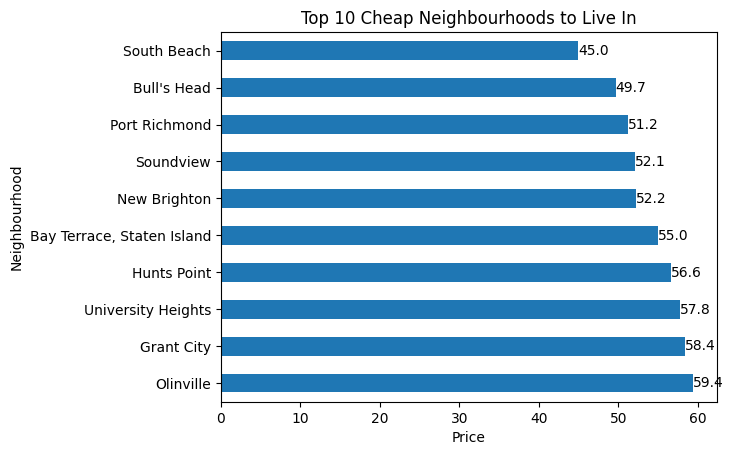

In [16]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
sorted_cheap = df_temp.sort_values().reset_index()
sorted_cheap = sorted_cheap.head(10)

plot2 = sorted_cheap.plot.barh(x='neighbourhood', y='price', legend=False)
plot2.invert_yaxis() # goes from lowest to highest
plot2.set_xlabel('Price')
plot2.set_ylabel('Neighbourhood')
plot2.set_title('Top 10 Cheap Neighbourhoods to Live In')
for index, value in enumerate(sorted_cheap['price']):
    plot2.text(value, index, f'{value:.1f}', va='center') 

####  Exercise 1: Now, create a bar chart and a corresponding pivot table of the top 10 LEAST expensive Neigborhoods
Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

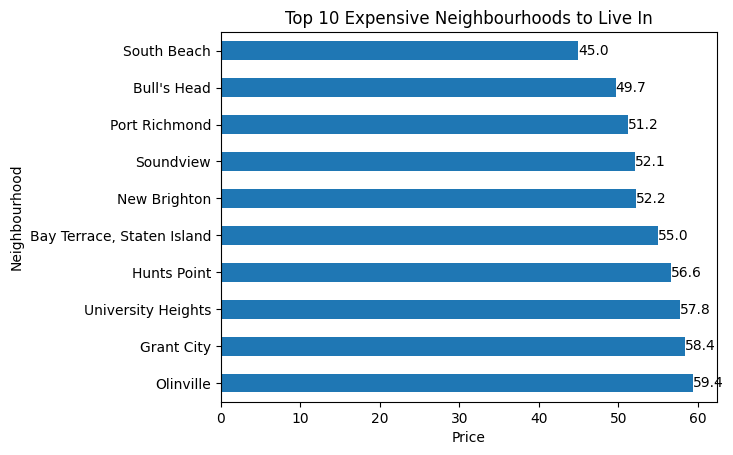

In [17]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
sorted_cheap = df_temp.sort_values().reset_index()
sorted_cheap = sorted_cheap.head(10)

plot2 = sorted_cheap.plot.barh(x='neighbourhood', y='price', legend=False)
plot2.invert_yaxis() # goes from lowest to highest
plot2.set_xlabel('Price')
plot2.set_ylabel('Neighbourhood')
plot2.set_title('Top 10 Expensive Neighbourhoods to Live In')
for index, value in enumerate(sorted_cheap['price']):
    plot2.text(value, index, f'{value:.1f}', va='center') 

In [18]:
# we also would like to have the corresponding pivot table of the top 10
sorted_cheap.to_csv('fileResultstest.csv')
sorted_exp.to_csv('fileResultstest2.csv')
sorted_cheap 

,neighbourhood,price
0,South Beach,45.000000
1,Bull's Head,49.666667
2,Port Richmond,51.222222
3,Soundview,52.055556
4,New Brighton,52.250000
5,"Bay Terrace, Staten Island",55.000000
6,Hunts Point,56.583333
7,University Heights,57.826087
8,Grant City,58.400000
9,Olinville,59.428571


In [19]:
#  Now make all four widgets in a Tableau dashboard!